In [ ]:
file_path = "./concated.txt"

In [ ]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.applications.vggface import VGGFace

import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from collections import Counter

import tensorflow as tf
from tensorflow import keras

from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import load_img, save_img, img_to_array, to_categorical

from keras.optimizers.optimizer_v1 import Optimizer
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, GlobalAveragePooling2D

In [ ]:
face_softmax = np.loadtxt("./face_softmax.txt")
ear_softmax = np.loadtxt("./ear_softmax.txt")

X_train = np.concatenate((face_softmax, ear_softmax), axis=1)

In [ ]:
X_train = np.loadtxt(file_path)

In [ ]:
y_train = np.array([i // 5 for i in range(len(X_train))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.15, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, shuffle=True)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_val = np.asarray(X_val)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_val = np.asarray(y_val)

In [ ]:
def loadModel():
  model = Sequential()
  model.add(Dense(256, input_dim=200, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(100, activation='softmax'))

  return model

model = loadModel()

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=['sparse_categorical_accuracy', 'accuracy']
)

In [ ]:
def scheduler(epoch, lr):
  if epoch < 100:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
from keras.callbacks import Callback

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        model = self.model
        #test_generator.reset()
        pred = model.predict(X_test)
        predicted_test = [np.argmax(x) for x in pred]
        accuracy = accuracy_score(predicted_test, y_test)
        print('Accuracy:', accuracy)
        print(predicted_test)

my_callback = MyCallback()

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[callback, my_callback], validation_data=(X_val, y_val))

Epoch 1/200
3/3 [==============================] - 0s 3ms/step
Accuracy: 0.013333333333333334
[34, 22, 6, 64, 64, 0, 67, 71, 64, 64, 6, 64, 5, 98, 98, 98, 98, 34, 97, 64, 98, 6, 64, 6, 5, 79, 5, 67, 98, 74, 67, 17, 6, 74, 5, 5, 74, 60, 22, 74, 5, 66, 74, 64, 5, 98, 79, 67, 80, 74, 64, 98, 91, 22, 88, 5, 79, 34, 98, 57, 6, 17, 6, 5, 5, 5, 67, 11, 81, 67, 74, 74, 41, 99, 67]
12/12 [==============================] - 5s 36ms/step - loss: 4.6046 - sparse_categorical_accuracy: 0.0111 - accuracy: 0.0111 - val_loss: 4.5972 - val_sparse_categorical_accuracy: 0.0156 - val_accuracy: 0.0156 - lr: 0.1000
Epoch 2/200
3/3 [==============================] - 0s 3ms/step
Accuracy: 0.04
[34, 22, 86, 64, 6, 0, 67, 71, 64, 64, 6, 5, 5, 22, 98, 98, 98, 34, 97, 64, 98, 6, 64, 6, 5, 67, 5, 67, 98, 67, 67, 98, 6, 98, 5, 5, 74, 60, 22, 74, 5, 66, 67, 64, 5, 98, 22, 67, 50, 74, 64, 98, 98, 22, 64, 5, 22, 34, 98, 5, 6, 17, 6, 59, 5, 5, 67, 67, 5, 67, 74, 22, 84, 99, 67]
12/12 [==============================] - 0s

In [ ]:
test_acc = [0.013333333333333334,0.04,0.04,0.04,0.05333333333333334,0.06666666666666667,0.08,0.10666666666666667,0.12,0.12,0.10666666666666667,0.14666666666666667,0.12,0.13333333333333333,0.14666666666666667,0.17333333333333334,0.2,0.24,0.25333333333333335,0.24,0.29333333333333333,0.3466666666666667,0.3333333333333333,0.3466666666666667,0.3466666666666667,0.36,0.4266666666666667,0.4533333333333333,0.4666666666666667,0.44,0.44,0.5066666666666667,0.5066666666666667,0.5066666666666667,0.5866666666666667,0.5733333333333334,0.5733333333333334,0.5733333333333334,0.6266666666666667,0.6666666666666666,0.6933333333333334,0.6933333333333334,0.6933333333333334,0.72,0.72,0.76,0.7733333333333333,0.8133333333333334,0.88,0.84,0.8933333333333333,0.9066666666666666,0.92,0.9466666666666667,0.9333333333333333,0.9466666666666667,0.9333333333333333,0.9466666666666667,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.9866666666666667,0.9866666666666667,0.96,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]

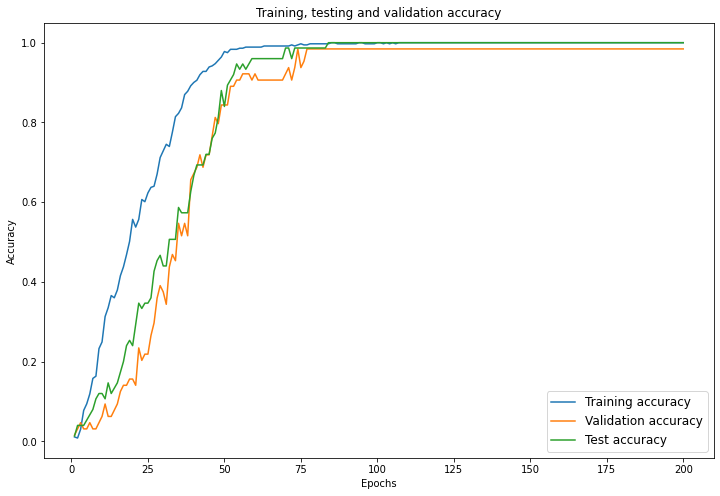

In [ ]:
import matplotlib.pyplot as plt

# get training accuracy values
train_acc = history.history['accuracy']#[:100]

# get validation accuracy values
val_acc = history.history['val_accuracy']#[:100]

# get number of epochs
epochs = range(1, len(train_acc) + 1)

# plot training and validation accuracy over epochs
plt.figure(figsize=(12,8))
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.plot(epochs, test_acc, label='Test accuracy')
plt.title('Training, testing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize=12)

plt.show()

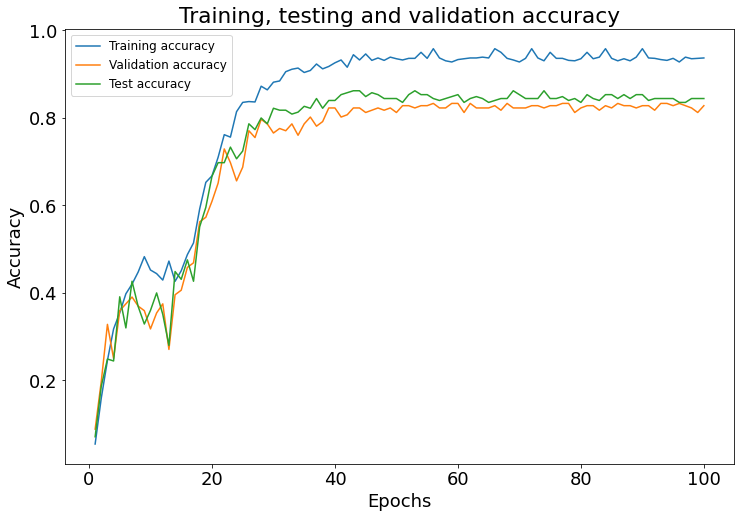

In [ ]:
import matplotlib.pyplot as plt

# get training accuracy values
train_acc_face = [0.0545,0.1597,0.2456,0.3176,0.3546,0.3980,0.4201,0.4478,0.4829,0.4524,0.4441,0.4294,0.4728,0.4266,0.4506,0.4875,0.5143,0.5919,0.6528,0.6676,0.7101,0.7618,0.7562,0.8144,0.8356,0.8375,0.8366,0.8726,0.8643,0.8818,0.8846,0.9058,0.9114,0.9141,0.9040,0.9086,0.9234,0.9123,0.9178,0.9261,0.9326,0.9160,0.9446,0.9326,0.9464,0.9317,0.9372,0.9317,0.9391,0.9354,0.9326,0.9363,0.9363,0.9501,0.9363,0.9584,0.9372,0.9307,0.9280,0.9335,0.9354, 0.9372, 0.9372, 0.9391, 0.9372, 0.9584, 0.9501, 0.9363, 0.9326, 0.928, 0.9363, 0.9584, 0.9372, 0.9307, 0.9501, 0.9363, 0.9363, 0.9317, 0.9307, 0.9354, 0.9501, 0.9354, 0.9391, 0.9584, 0.9363, 0.9307, 0.9354, 0.9307, 0.9391, 0.9584, 0.9372, 0.9363, 0.9335, 0.9317, 0.9363, 0.928, 0.9391, 0.9354, 0.9363, 0.9372]

# get validation accuracy values
val_acc_face = [0.0885,0.1979,0.3281,0.2500,0.3594,0.3750,0.3906,0.3698,0.3594,0.3177,0.3542,0.3750,0.2708,0.3958,0.4062,0.4583,0.4688,0.5625,0.5729,0.6094,0.6510,0.7292,0.6979,0.6562,0.6875,0.7708,0.7552,0.7969,0.7865,0.7656,0.7760,0.7708,0.7865,0.7604,0.7865,0.8021,0.7812,0.7917,0.8229,0.8229,0.8021,0.8073,0.8229,0.8229,0.8125,0.8177,0.8229,0.8177,0.8229,0.8125,0.8281,0.8281,0.8229,0.8281,0.8281,0.8333,0.8229,0.8229,0.8333,0.8333, 0.8125, 0.8333, 0.8229, 0.8229, 0.8229, 0.8281, 0.8177, 0.8333, 0.8229, 0.8229, 0.8229, 0.8281, 0.8281, 0.8229, 0.8281, 0.8281, 0.8333, 0.8333, 0.8125, 0.8229, 0.8281, 0.8281, 0.8177, 0.8281, 0.8229, 0.8333, 0.8281, 0.8281, 0.8229, 0.8281, 0.8281, 0.8177, 0.8333, 0.8333, 0.8281, 0.8333, 0.8281, 0.8229, 0.8125, 0.8281]

test_acc_face = [0.07111111111111111,0.18666666666666668,0.24888888888888888,0.24444444444444444,0.39111111111111113,0.32,0.4266666666666667,0.3688888888888889,0.3288888888888889,0.36,0.4,0.3511111111111111,0.28,0.4488888888888889,0.4311111111111111,0.47555555555555556,0.4266666666666667,0.5511111111111111,0.5955555555555555,0.6666666666666666,0.6977777777777778,0.6977777777777778,0.7333333333333333,0.7066666666666667,0.7244444444444444,0.7866666666666666,0.7733333333333333,0.8,0.7866666666666666,0.8222222222222222,0.8177777777777778,0.8177777777777778,0.8088888888888889,0.8133333333333334,0.8266666666666667,0.8222222222222222,0.8444444444444444,0.8222222222222222,0.84,0.84,0.8533333333333334,0.8577777777777778,0.8622222222222222,0.8622222222222222,0.8488888888888889,0.8577777777777778,0.8533333333333334,0.8444444444444444,0.8444444444444444,0.8444444444444444,0.8355555555555556,0.8533333333333334,0.8622222222222222,0.8533333333333334,0.8533333333333334,0.8444444444444444,0.84,0.8444444444444444,0.8488888888888889,0.8533333333333334, 0.8355555555555556, 0.8444444444444444, 0.8488888888888889, 0.8444444444444444, 0.8355555555555556, 0.84, 0.8444444444444444, 0.8444444444444444, 0.8622222222222222, 0.8533333333333334, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8622222222222222, 0.8444444444444444, 0.8444444444444444, 0.8488888888888889, 0.84, 0.8444444444444444, 0.8355555555555556, 0.8533333333333334, 0.8444444444444444, 0.84, 0.8533333333333334, 0.8533333333333334, 0.8444444444444444, 0.8533333333333334, 0.8444444444444444, 0.8533333333333334, 0.8533333333333334, 0.84, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8355555555555556, 0.8355555555555556, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444]

# get number of epochs
epochs = range(1, len(train_acc_face) + 1)

# plot training and validation accuracy over epochs
plt.figure(figsize=(12,8))
plt.plot(epochs, train_acc_face, label='Training accuracy')
plt.plot(epochs, val_acc_face, label='Validation accuracy')
plt.plot(epochs, test_acc_face, label='Test accuracy')
plt.title('Training, testing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize=12)

plt.show()

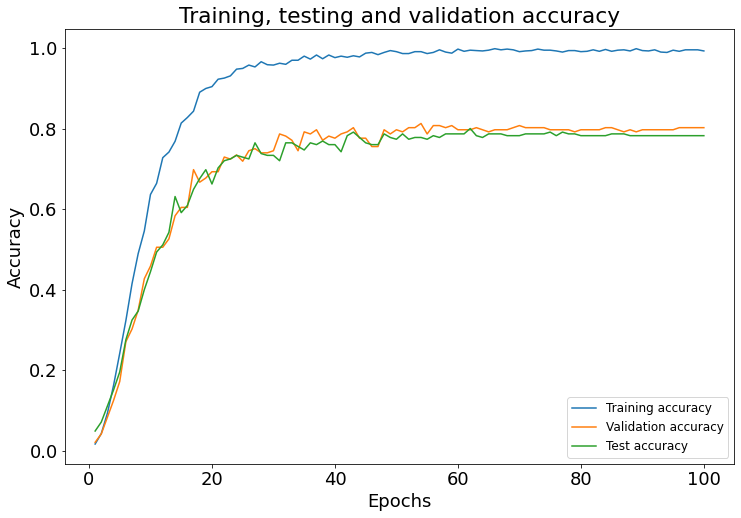

In [ ]:
import matplotlib.pyplot as plt

# get training accuracy values
train_acc_face = [0.0166,0.0425,0.0933,0.1625,0.2419,0.3232,0.4146,0.4894,0.5457,0.6362,0.6639,0.7276,0.7415,0.7682,0.8135,0.8273,0.8430,0.8901,0.8994,0.9040,0.9224,0.9252,0.9307,0.9474,0.9492,0.9575,0.9529,0.9658,0.9584,0.9575,0.9621,0.9594,0.9695,0.9695,0.9797,0.9723,0.9825,0.9732,0.9825,0.9760,0.9797,0.9769,0.9806,0.9778,0.9871,0.9889,0.9834,0.9889,0.9935,0.9908,0.9861,0.9861,0.9908,0.9908,0.9861,0.9889,0.9954,0.9898,0.9871,0.9972,0.9917,0.9945,0.9935,0.9926,0.9945,0.9982,0.9954,0.9972,0.9954,0.9908,0.9926,0.9935,0.9972,0.9945,0.9945,0.9926,0.9898,0.9935,0.9935,0.9908,0.9917,0.9954,0.9917,0.9963,0.9917,0.9945,0.9954,0.9926,0.9982,0.9935,0.9926,0.9954,0.9898,0.9889,0.9945,0.9917,0.9954,0.9954,0.9954,0.9926]

# get validation accuracy values
val_acc_face = [0.0208,0.0417,0.0833,0.1250,0.1719,0.2708,0.3021,0.3490,0.4271,0.4583,0.5052,0.5052,0.5260,0.5833,0.6042,0.6042,0.6979,0.6667,0.6771,0.6927,0.6927,0.7292,0.7240,0.7344,0.7188,0.7448,0.7500,0.7396,0.7396,0.7448,0.7865,0.7812,0.7708,0.7448,0.7917,0.7865,0.7969,0.7708,0.7812,0.7760,0.7865,0.7917,0.8021,0.7760,0.7760,0.7552,0.7552,0.7969,0.7865,0.7969,0.7917,0.8021,0.8021,0.8125,0.7865,0.8073,0.8073,0.8021,0.8073,0.7969,0.7969,0.7969,0.8021,0.7969,0.7917,0.7969,0.7969,0.7969,0.8021,0.8073,0.8021,0.8021,0.8021,0.8021,0.7969,0.7969,0.7969,0.7969,0.7917,0.7969,0.7969,0.7969,0.7969,0.8021,0.8021,0.7969,0.7917,0.7969,0.7917,0.7969,0.7969,0.7969,0.7969,0.7969,0.7969,0.8021,0.8021,0.8021,0.8021,0.8021]

test_acc_face = [0.04888888888888889,0.07111111111111111,0.1111111111111111,0.1511111111111111,0.19555555555555557,0.27555555555555555,0.3244444444444444,0.3466666666666667,0.4,0.4444444444444444,0.49333333333333335,0.5111111111111111,0.5422222222222223,0.6311111111111111,0.5911111111111111,0.6088888888888889,0.6488888888888888,0.6755555555555556,0.6977777777777778,0.6622222222222223,0.7022222222222222,0.72,0.7244444444444444,0.7333333333333333,0.7288888888888889,0.7244444444444444,0.7644444444444445,0.7377777777777778,0.7333333333333333,0.7333333333333333,0.72,0.7644444444444445,0.7644444444444445,0.7555555555555555,0.7466666666666667,0.7644444444444445,0.76,0.7688888888888888,0.76,0.76,0.7422222222222222,0.7822222222222223,0.7911111111111111,0.7777777777777778,0.7644444444444445,0.76,0.76,0.7866666666666666,0.7777777777777778,0.7733333333333333,0.7866666666666666,0.7733333333333333,0.7777777777777778,0.7777777777777778,0.7733333333333333,0.7822222222222223,0.7777777777777778,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.8,0.7822222222222223,0.7777777777777778,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7911111111111111,0.7822222222222223,0.7911111111111111,0.7866666666666666,0.7866666666666666,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223]

# get number of epochs
epochs_face = range(1, len(train_acc_face) + 1)

# plot training and validation accuracy over epochs
plt.figure(figsize=(12,8))
plt.plot(epochs_face, train_acc_face, label='Training accuracy')
plt.plot(epochs_face, val_acc_face, label='Validation accuracy')
plt.plot(epochs_face, test_acc_face, label='Test accuracy')
plt.title('Training, testing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize=12)


plt.show()

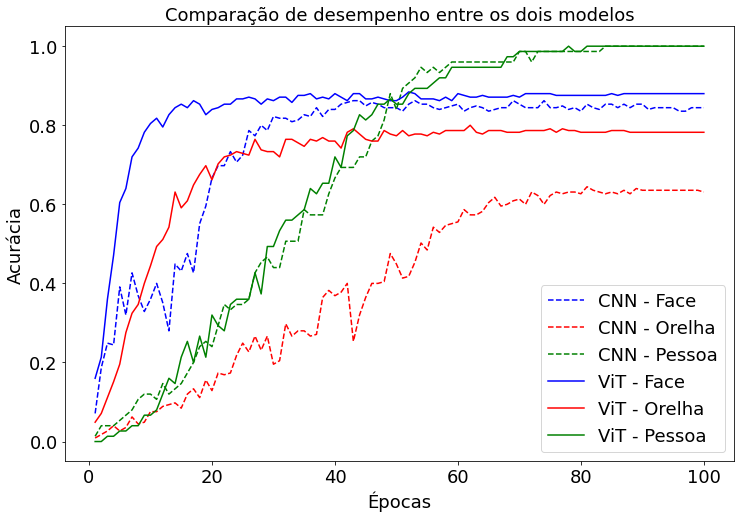

In [ ]:
import matplotlib.pyplot as plt
# get training accuracy values
cnn_face = [0.07111111111111111,0.18666666666666668,0.24888888888888888,0.24444444444444444,0.39111111111111113,0.32,0.4266666666666667,0.3688888888888889,0.3288888888888889,0.36,0.4,0.3511111111111111,0.28,0.4488888888888889,0.4311111111111111,0.47555555555555556,0.4266666666666667,0.5511111111111111,0.5955555555555555,0.6666666666666666,0.6977777777777778,0.6977777777777778,0.7333333333333333,0.7066666666666667,0.7244444444444444,0.7866666666666666,0.7733333333333333,0.8,0.7866666666666666,0.8222222222222222,0.8177777777777778,0.8177777777777778,0.8088888888888889,0.8133333333333334,0.8266666666666667,0.8222222222222222,0.8444444444444444,0.8222222222222222,0.84,0.84,0.8533333333333334,0.8577777777777778,0.8622222222222222,0.8622222222222222,0.8488888888888889,0.8577777777777778,0.8533333333333334,0.8444444444444444,0.8444444444444444,0.8444444444444444,0.8355555555555556,0.8533333333333334,0.8622222222222222,0.8533333333333334,0.8533333333333334,0.8444444444444444,0.84,0.8444444444444444,0.8488888888888889,0.8533333333333334, 0.8355555555555556, 0.8444444444444444, 0.8488888888888889, 0.8444444444444444, 0.8355555555555556, 0.84, 0.8444444444444444, 0.8444444444444444, 0.8622222222222222, 0.8533333333333334, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8622222222222222, 0.8444444444444444, 0.8444444444444444, 0.8488888888888889, 0.84, 0.8444444444444444, 0.8355555555555556, 0.8533333333333334, 0.8444444444444444, 0.84, 0.8533333333333334, 0.8533333333333334, 0.8444444444444444, 0.8533333333333334, 0.8444444444444444, 0.8533333333333334, 0.8533333333333334, 0.84, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8355555555555556, 0.8355555555555556, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444]

# get validation accuracy values
cnn_ear = [0.008888888888888889,0.017777777777777778,0.02666666666666667,0.04,0.02666666666666667,0.035555555555555556,0.06222222222222222,0.044444444444444446,0.04888888888888889,0.07555555555555556,0.07555555555555556,0.08888888888888889,0.09333333333333334,0.09777777777777778,0.08444444444444445,0.12,0.13333333333333333,0.1111111111111111,0.15555555555555556,0.1288888888888889,0.17333333333333334,0.1688888888888889,0.17333333333333334,0.21777777777777776,0.24888888888888888,0.22666666666666666,0.26666666666666666,0.2311111111111111,0.26666666666666666,0.19555555555555557,0.20444444444444446,0.29777777777777775,0.26666666666666666,0.28,0.28,0.26666666666666666,0.27111111111111114,0.36444444444444446,0.38222222222222224,0.3688888888888889,0.37777777777777777,0.4,0.25333333333333335,0.32,0.36444444444444446,0.4,0.4,0.40444444444444444,0.47555555555555556,0.4488888888888889,0.41333333333333333,0.4177777777777778,0.4533333333333333,0.5022222222222222,0.48444444444444446,0.5422222222222223,0.5288888888888889,0.5466666666666666,0.5511111111111111,0.5555555555555556,0.5866666666666667,0.5733333333333334,0.5733333333333334,0.5822222222222222,0.6044444444444445,0.6177777777777778,0.5955555555555555,0.6,0.6088888888888889,0.6133333333333333,0.6,0.6311111111111111,0.6222222222222222,0.6,0.6222222222222222,0.6311111111111111,0.6266666666666667,0.6311111111111111,0.6311111111111111,0.6266666666666667,0.6444444444444445,0.6355555555555555,0.6311111111111111,0.6266666666666667,0.6311111111111111,0.6266666666666667,0.6355555555555555,0.6266666666666667,0.64,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6355555555555555,0.6311111111111111]

cnn_combined = [0.013333333333333334,0.04,0.04,0.04,0.05333333333333334,0.06666666666666667,0.08,0.10666666666666667,0.12,0.12,0.10666666666666667,0.14666666666666667,0.12,0.13333333333333333,0.14666666666666667,0.17333333333333334,0.2,0.24,0.25333333333333335,0.24,0.29333333333333333,0.3466666666666667,0.3333333333333333,0.3466666666666667,0.3466666666666667,0.36,0.4266666666666667,0.4533333333333333,0.4666666666666667,0.44,0.44,0.5066666666666667,0.5066666666666667,0.5066666666666667,0.5866666666666667,0.5733333333333334,0.5733333333333334,0.5733333333333334,0.6266666666666667,0.6666666666666666,0.6933333333333334,0.6933333333333334,0.6933333333333334,0.72,0.72,0.76,0.7733333333333333,0.8133333333333334,0.88,0.84,0.8933333333333333,0.9066666666666666,0.92,0.9466666666666667,0.9333333333333333,0.9466666666666667,0.9333333333333333,0.9466666666666667,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.9866666666666667,0.9866666666666667,0.96,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0][:100]

vit_ear = [0.04888888888888889,0.07111111111111111,0.1111111111111111,0.1511111111111111,0.19555555555555557,0.27555555555555555,0.3244444444444444,0.3466666666666667,0.4,0.4444444444444444,0.49333333333333335,0.5111111111111111,0.5422222222222223,0.6311111111111111,0.5911111111111111,0.6088888888888889,0.6488888888888888,0.6755555555555556,0.6977777777777778,0.6622222222222223,0.7022222222222222,0.72,0.7244444444444444,0.7333333333333333,0.7288888888888889,0.7244444444444444,0.7644444444444445,0.7377777777777778,0.7333333333333333,0.7333333333333333,0.72,0.7644444444444445,0.7644444444444445,0.7555555555555555,0.7466666666666667,0.7644444444444445,0.76,0.7688888888888888,0.76,0.76,0.7422222222222222,0.7822222222222223,0.7911111111111111,0.7777777777777778,0.7644444444444445,0.76,0.76,0.7866666666666666,0.7777777777777778,0.7733333333333333,0.7866666666666666,0.7733333333333333,0.7777777777777778,0.7777777777777778,0.7733333333333333,0.7822222222222223,0.7777777777777778,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.8,0.7822222222222223,0.7777777777777778,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7911111111111111,0.7822222222222223,0.7911111111111111,0.7866666666666666,0.7866666666666666,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7866666666666666,0.7866666666666666,0.7866666666666666,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223,0.7822222222222223]

vit_face = [0.16,0.21333333333333335,0.36,0.4711111111111111,0.6044444444444445,0.64,0.72,0.7422222222222222,0.7822222222222223,0.8044444444444444,0.8177777777777778,0.7955555555555556,0.8266666666666667,0.8444444444444444,0.8533333333333334,0.8444444444444444,0.8622222222222222,0.8533333333333334,0.8266666666666667,0.84,0.8444444444444444,0.8533333333333334,0.8533333333333334,0.8666666666666667,0.8666666666666667,0.8711111111111111,0.8666666666666667,0.8533333333333334,0.8666666666666667,0.8622222222222222,0.8711111111111111,0.8711111111111111,0.8577777777777778,0.8755555555555555,0.8755555555555555,0.88,0.8666666666666667,0.8711111111111111,0.8666666666666667,0.88,0.8711111111111111,0.8622222222222222,0.88,0.88,0.8666666666666667,0.8666666666666667,0.8711111111111111,0.8666666666666667,0.8622222222222222,0.8622222222222222,0.8711111111111111,0.8844444444444445,0.88,0.8666666666666667,0.8666666666666667,0.8666666666666667,0.8622222222222222,0.8711111111111111,0.8622222222222222,0.88,0.8755555555555555,0.8711111111111111,0.8711111111111111,0.8755555555555555,0.8711111111111111,0.8711111111111111,0.8711111111111111,0.8711111111111111,0.8755555555555555,0.8711111111111111,0.88,0.88,0.88,0.88,0.88,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.8755555555555555,0.88,0.8755555555555555,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88,0.88]

vit_combined = [0.0,0.0,0.013333333333333334,0.013333333333333334,0.02666666666666667,0.02666666666666667,0.04,0.04,0.06666666666666667,0.06666666666666667,0.08,0.12,0.16,0.14666666666666667,0.21333333333333335,0.25333333333333335,0.2,0.26666666666666666,0.21333333333333335,0.32,0.29333333333333333,0.28,0.3466666666666667,0.36,0.36,0.36,0.4266666666666667,0.37333333333333335,0.49333333333333335,0.49333333333333335,0.5333333333333333,0.56,0.56,0.5733333333333334,0.5866666666666667,0.64,0.6266666666666667,0.6533333333333333,0.6533333333333333,0.72,0.6933333333333334,0.7733333333333333,0.7866666666666666,0.8266666666666667,0.8133333333333334,0.8266666666666667,0.8533333333333334,0.8533333333333334,0.8666666666666667,0.8533333333333334,0.8533333333333334,0.88,0.8933333333333333,0.8933333333333333,0.8933333333333333,0.9066666666666666,0.92,0.92,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9466666666666667,0.9733333333333334,0.9733333333333334,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,0.9866666666666667,1.0,0.9866666666666667,0.9866666666666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0][:100]


# get number of epochs
epochs_face = range(1, len(cnn_face) + 1)
plt.rcParams.update({'font.size': 18})

# plot training and validation accuracy over epochs
plt.figure(figsize=(12,8))
plt.plot(epochs_face, cnn_face, 'b', label='CNN - Face', linestyle='dashed')
plt.plot(epochs_face, cnn_ear, 'r', label='CNN - Orelha', linestyle='dashed')
plt.plot(epochs_face, cnn_combined, 'g', label='CNN - Pessoa', linestyle='dashed')
plt.plot(epochs_face, vit_face, 'b-', label='ViT - Face')
plt.plot(epochs_face, vit_ear, 'r-', label='ViT - Orelha')
plt.plot(epochs_face, vit_combined, 'g-', label='ViT - Pessoa')
plt.title('Comparação de desempenho entre os dois modelos', fontsize=18)
plt.xlabel('Épocas', fontsize=18)
plt.ylabel('Acurácia', fontsize=18)
plt.legend(fontsize=18)
# plt.ylim(0, 1)

plt.show()

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip show numpy

Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: aeppl, aesara, albumentations, altair, arviz, astropy, atari-py, autograd, blis, bokeh, cftime, cmdstanpy, cufflinks, cvxpy, daft, datascience, db-dtypes, ecos, fa2, fastdtw, fix-yahoo-finance, folium, gensim, gym, h5py, holoviews, httpstan, hyperopt, imageio, imbalanced-learn, imgaug, jax, jaxlib, jpeg4py, kapre, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, mlxtend, moviepy, netCDF4, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pyemd, pyerfa, pymc, pystan, python-louvain, PyWavelets, qdldl, qudida, resampy, scikit-image, scikit-learn, scipy, scs, seaborn, shapely, sklearn

In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.5.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.8/dist-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, daft, datascience, descartes, fastai, imgaug, keras-vis, matplotlib-venn, missingno, mizani, mlxtend, pandas-profiling, plotnine, prophet, pycocotools, scikit-image, seaborn, wordcloud, yellowbrick


In [ ]:
def true_positive(y_true, y_pred):
    
    tp = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 1 and yp == 1:
            tp += 1
    
    return tp

def true_negative(y_true, y_pred):
    
    tn = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 0 and yp == 0:
            tn += 1
            
    return tn

def false_positive(y_true, y_pred):
    
    fp = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 0 and yp == 1:
            fp += 1
            
    return fp

def false_negative(y_true, y_pred):
    
    fn = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 1 and yp == 0:
            fn += 1
            
    return fn

def macro_precision(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in list(np.unique(y_true)):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)
        
        
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        # keep adding precision for all classes
        precision += temp_precision
        
    # calculate and return average precision over all classes
    precision /= num_classes
    
    return precision

def micro_precision(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in np.unique(y_true):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

def macro_recall(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize recall to 0
    recall = 0
    
    # loop over all classes
    for class_ in list(np.unique(y_true)):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false negative for current class
        fn = false_negative(temp_true, temp_pred)
        
        
        # compute recall for current class
        temp_recall = tp / (tp + fn + 1e-6)
        
        # keep adding recall for all classes
        recall += temp_recall
        
    # calculate and return average recall over all classes
    recall /= num_classes
    
    return recall

def micro_recall(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fn = 0
    
    # loop over all classes
    for class_ in np.unique(y_true):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false negative for current class
        # and update overall tp
        fn += false_negative(temp_true, temp_pred)
        
    # calculate and return overall recall
    recall = tp / (tp + fn)
    return recall

In [ ]:
pred = [56, 64, 3, 10, 69, 64, 31, 59, 86, 56, 14, 58, 34, 49, 43, 59, 19, 65, 63, 52, 8, 79, 57, 71, 92, 26, 80, 35, 7, 60, 54, 7, 71, 26, 96, 58, 57, 57, 21, 97, 73, 48, 96, 40, 37, 18, 42, 29, 78, 1, 6, 27, 5, 71, 87, 14, 9, 68, 49, 57, 34, 80, 55, 80, 81, 70, 2, 26, 9, 82, 40, 51, 10, 28, 27, 67, 0, 77, 45, 51, 71, 93, 85, 92, 61, 27, 60, 46, 70, 90, 31, 26, 5, 80, 78, 43, 30, 7, 56, 24, 28, 81, 19, 18, 73, 18, 42, 39, 0, 99, 76, 7, 87, 15, 63, 7, 38, 14, 12, 54, 98, 0, 20, 55, 25, 20, 21, 56, 47, 25, 28, 77, 99, 95, 89, 25, 65, 11, 47, 83, 16, 12, 90, 42, 22, 86, 0, 22, 13, 10]
y_true = [56, 64, 3, 10, 69, 64, 31, 59, 86, 56, 14, 58, 34, 49, 43, 59, 19, 65, 63, 52, 8, 79, 57, 71, 92, 26, 80, 35, 7, 60, 54, 7, 71, 26, 96, 58, 57, 57, 21, 97, 73, 48, 96, 40, 37, 18, 42, 29, 78, 1, 6, 27, 5, 71, 87, 14, 9, 68, 49, 57, 34, 80, 55, 80, 81, 70, 2, 26, 9, 82, 40, 51, 10, 28, 27, 67, 0, 77, 45, 51, 71, 93, 85, 92, 61, 27, 60, 46, 70, 90, 31, 26, 5, 80, 78, 43, 30, 7, 56, 24, 28, 81, 19, 18, 73, 18, 42, 39, 0, 99, 76, 7, 87, 15, 63, 7, 38, 14, 12, 54, 98, 0, 20, 55, 25, 20, 21, 56, 47, 25, 28, 77, 99, 95, 89, 25, 65, 11, 47, 83, 16, 12, 90, 42, 22, 86, 0, 22, 13, 10]

In [ ]:
print(f"Macro-averaged Precision score : {macro_precision(y_true, pred) }")
# print(f"Micro-averaged Precision score : {micro_precision(y_test, predicted_test)}")
print(f"Macro-averaged recall score : {macro_recall(y_true, pred)}")

Macro-averaged Precision score : 0.9999993267495074
Macro-averaged recall score : 0.9999993267495074
